<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경사하강법과 선형회귀 - 로지스틱 회귀

KNN - 정규분포, 표준정규분포,rescale

KMeans

퍼셉트론 - 활성화함수의 필요성

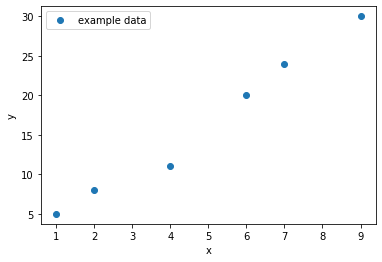

In [1]:
import matplotlib.pyplot as plt
ex_xs = [[2],[4],[7],[1],[9],[6]] #독립변수 6개
ex_ys = [8,11,24,5,30,20] #종속변수 6개

plt.plot(ex_xs[:], ex_ys, 'o', label = "example data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


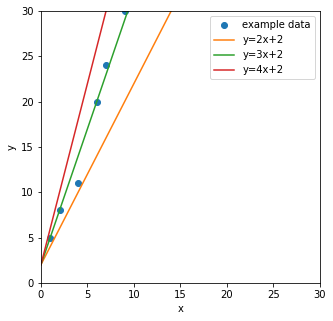

In [2]:
plt.figure(figsize=(5,5))
plt.plot(ex_xs[:], ex_ys, 'o', label = "example data")
plt.plot([0,30], [0*2+2, 30*2+2], label = "y=2x+2")
plt.plot([0,30], [0*3+2, 30*3+2], label = "y=3x+2")
plt.plot([0,30], [0*4+2, 30*4+2], label = "y=4x+2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()


In [3]:
import numpy as np

In [4]:
def mse(yp, y): #yp:예측값, y:실제값
  """
  (예측값-실제값)의 제곱의 평균을 구하는 손실함수
  """
  return np.mean(sum(yp-y)**2)

In [5]:
b=2 #편향은 2라고 가정하자.
mses=[]
wpl=np.arange(-10,10,0.5) #가중치를 -10~10까지 0.5씩 증가하면서 확인해보자.
for wp in wpl:
  yp = wp*np.array(ex_xs)+b #예측값
  mses.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

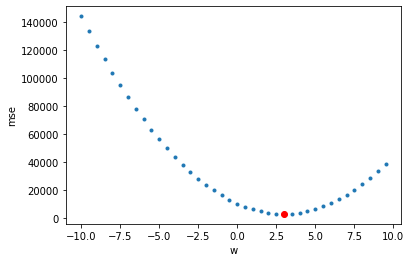

3.0


In [6]:
mi = np.array(mses).argmin() #최솟값이 있는 인덱스
plt.plot(wpl, mses, '.')
plt.plot(wpl[mi], mses[mi], 'or') #최솟값
plt.xlabel('w')
plt.ylabel('mse')
plt.show()
print(wpl[mi])

In [7]:
w=3 #가중치를 3이라고 가정하자.
mses2=[]
bpl=np.arange(-10,10,0.5) #편향을 -10~10까지 0.5씩 증가하면서 확인해보자.
for bp in bpl:
  yp = w*np.array(ex_xs)+bp #예측값
  mses2.append(mse(yp,ex_ys)) #mse를 구하여 mses2에 보관

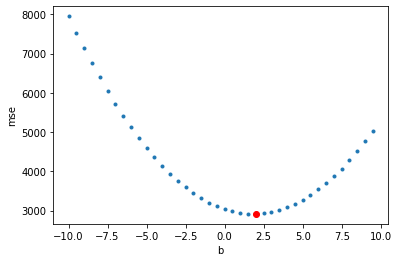

2.0


In [8]:
mi2 = np.array(mses2).argmin() #최솟값이 있는 인덱스
plt.plot(bpl, mses2, '.')
plt.plot(bpl[mi2], mses2[mi2], 'or') #최솟값
plt.xlabel('b')
plt.ylabel('mse')
plt.show()
print(bpl[mi2])

dmse/dw = 2mean(y-(wx+b))x
dmse/db = 2mean(y-(wx+b))

In [9]:
def gradient(y,x,w,b):
  yp = w*x+b
  error = y-yp
  wd = (2*sum(error*x)/len(x))
  bd = (2*sum(error)/len(x)) 
  return wd, bd  

In [10]:
from re import A
def gradient_descent(x,y,lr=0.001, epochs=100):
  """
  경사하강법 함수
  입력 매개변수 : x,y,lr,epochs
    x:독립변수
    y:종속변수
    lr:경사를 이동시킬 때 사용할 비율(lr*경사만큼 이동)
    epochs:학습횟수
  """
  if isinstance(x,list): #x가 list일 때
    x=np.array(x).reshape(-1) #1차원 numpy 배열로 변화
  wbhl = [] #학습과정을 기록할 컬렉션

  wp = np.random.uniform(-1, 1) #가중치 초기값을 -1~1 사이의 랜덤 값으로 지정
  bp = np.random.uniform(-1, 1) #편향 초기값을 -1~1 사이의 랜덤 값으로 지정
  amse = 0 #경사를 조절한 후에 mse를 기억할 변수를 0으로 초기화
  for epoch in range(epochs): #epochs 횟수만큼 학습시킨다.
    bmse = amse #이전 mse로 설정
    wd, bd = gradient(y, x, wp, bp) #경사를 구함(여기에서는 경사에 -부호를 취한 값)
    yp = wp*x + bp #예측
    amse = mse(yp, y) #새로 계산한 mse값
    wp = wp-(wd*lr) #가중치를 조절
    bp = bp-(bd*lr) #편향을 조절
    wbhl.append([wp, bp]) #히스토리에 가중치와 편향을 보관
    if np.abs(bmse-amse)<0.001:   #이전 mse와 이후 mse의 차이가 정해준 값보다 작다면
      break #더 이상 학습하지 말고 반복문 탈출하라
  return wp,bp,wbhl #가중치, 편향, 히스토리 반환

In [11]:
wp,bp,wbhl = gradient_descent(ex_xs,ex_ys)
for epoch,  (ewp,ebp) in enumerate(wbhl):
  print(f'epoch:{epoch} w:{ewp} b:{ebp}')

epoch:0 w:0.4930876976778227 b:-0.14754404334826426
epoch:1 w:0.31473057174737373 b:-0.17573928369074185
epoch:2 w:0.12498329764394955 b:-0.20571503339789873
epoch:3 w:-0.07688132212575727 b:-0.23758495825413636
epoch:4 w:-0.29163691246805284 b:-0.2714699809511936
epoch:5 w:-0.5201064898277563 b:-0.3074987444002872
epoch:6 w:-0.7631656155562225 b:-0.3458081046240894
epoch:7 w:-1.0217457506039267 b:-0.38654365511704775
epoch:8 w:-1.2968378243910363 b:-0.4298602846831198
epoch:9 w:-1.5894960315300144 b:-0.47592277088826607
epoch:10 w:-1.9008418709473052 b:-0.5249064114014994
epoch:11 w:-2.2320684428799016 b:-0.5769976956434597
epoch:12 w:-2.5844450202106355 b:-0.632395019315919
epoch:13 w:-2.9593219116571525 b:-0.6913094445499204
epoch:14 w:-3.3581356354477645 b:-0.7539655085850394
epoch:15 w:-3.782414423306997 b:-0.8206020840782046
epoch:16 w:-4.233784075839223 b:-0.8914732943383286
epoch:17 w:-4.713974191745138 b:-0.966849486993451
epoch:18 w:-5.224824794738189 b:-1.0470182698209742
ep

In [12]:
xs = np.array(ex_xs)
xs = xs[: ,0] #1차원배열로
ys = np.array(ex_ys)

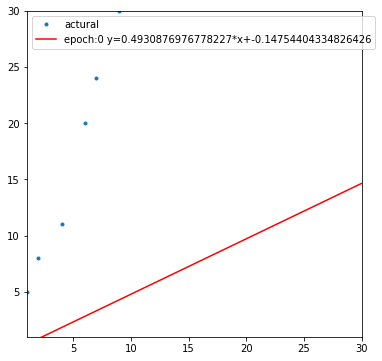

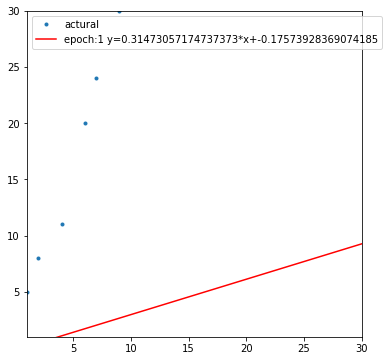

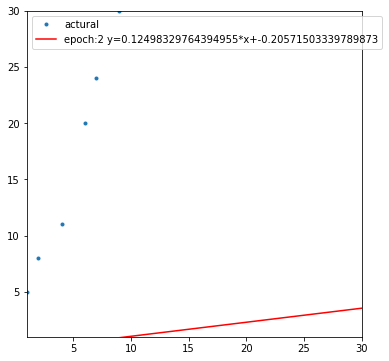

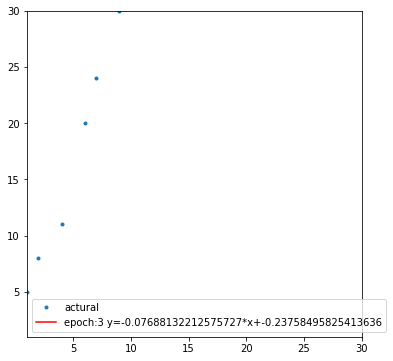

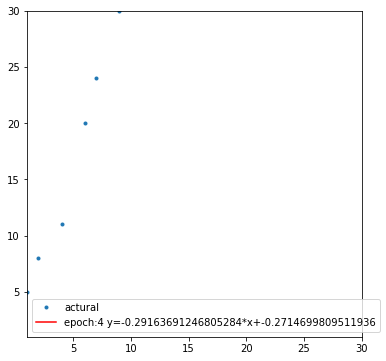

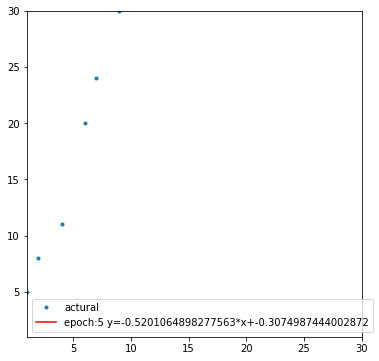

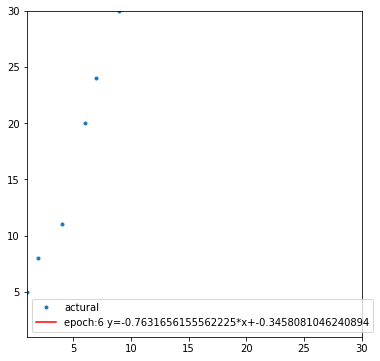

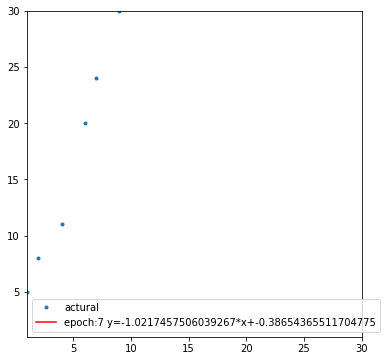

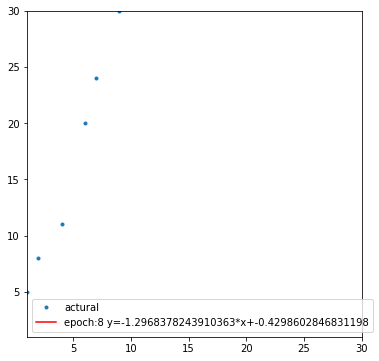

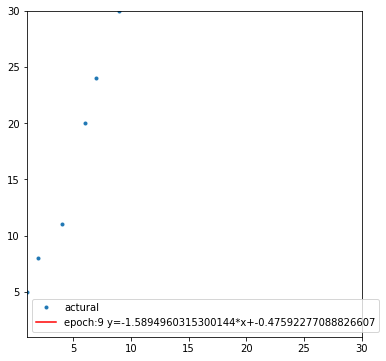

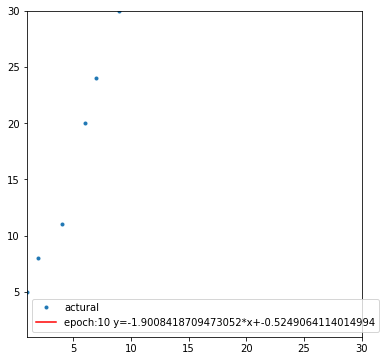

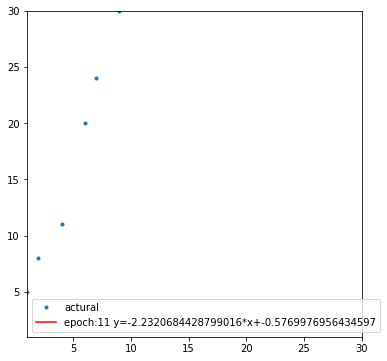

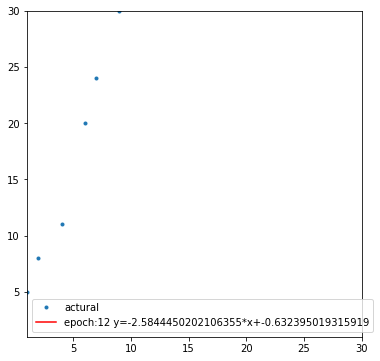

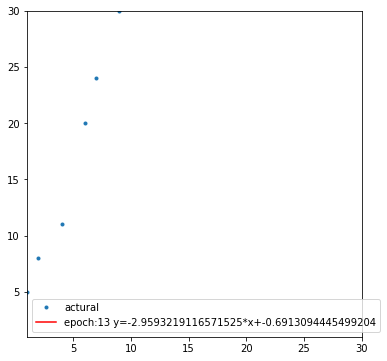

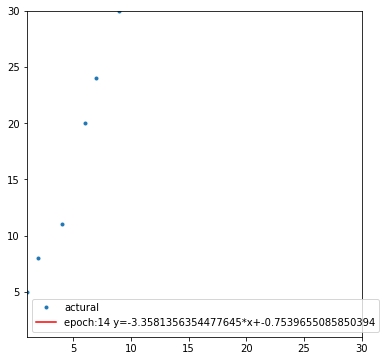

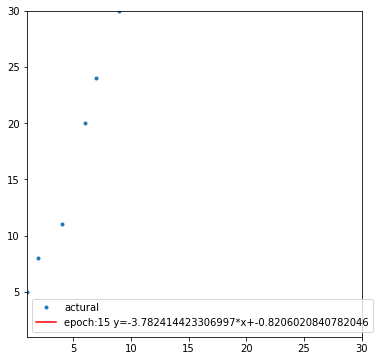

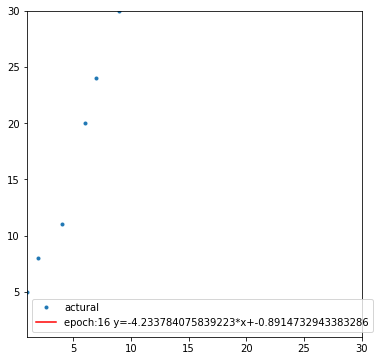

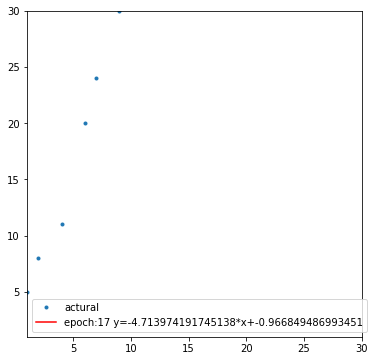

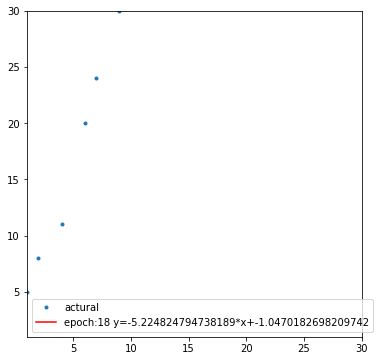

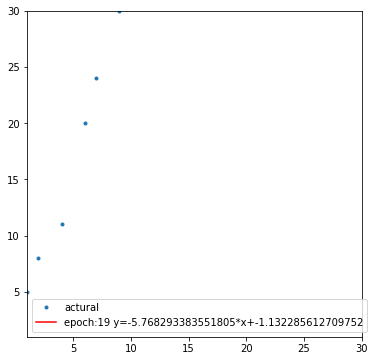

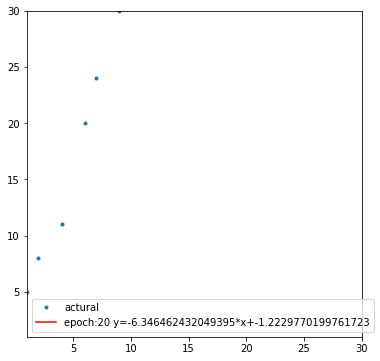

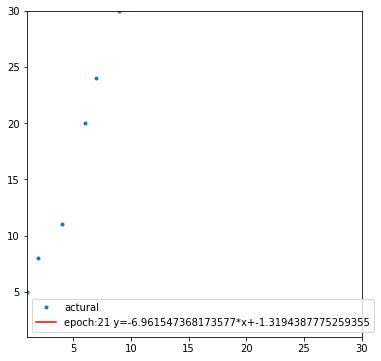

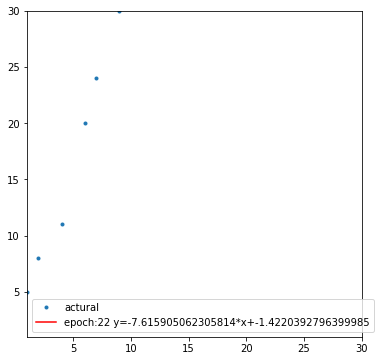

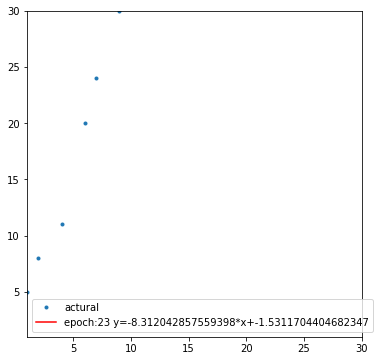

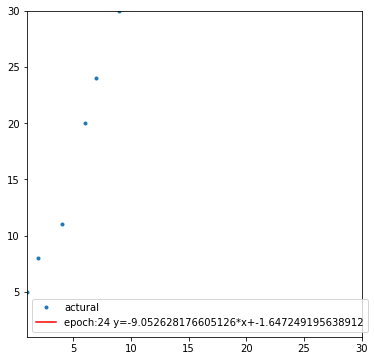

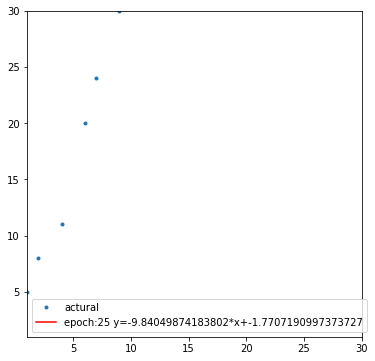

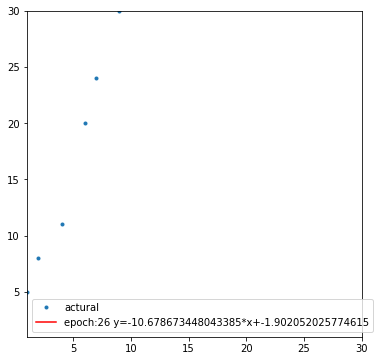

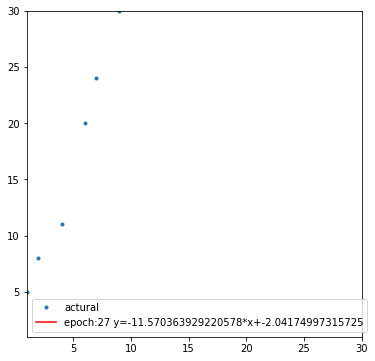

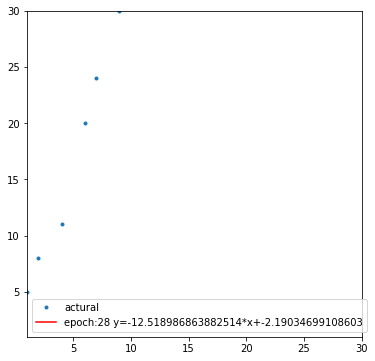

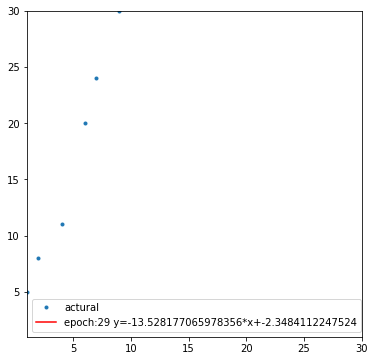

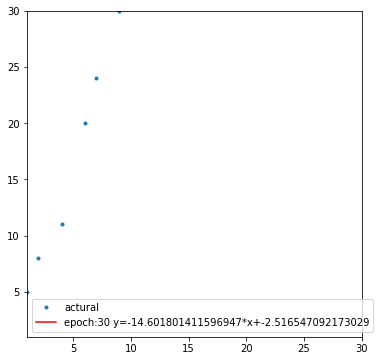

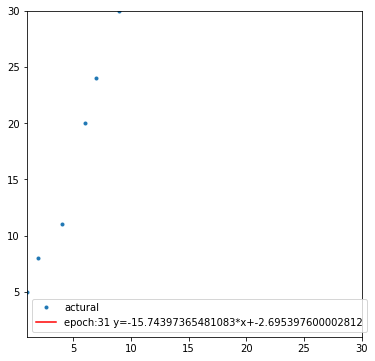

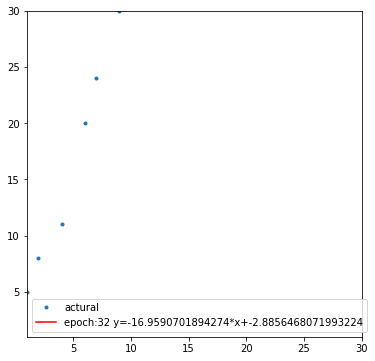

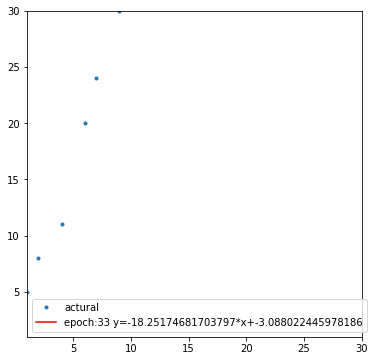

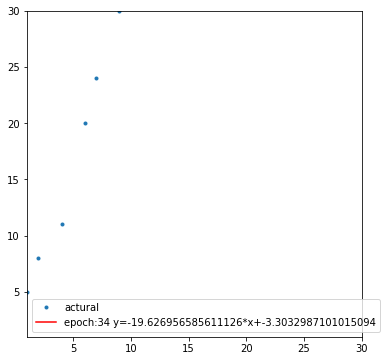

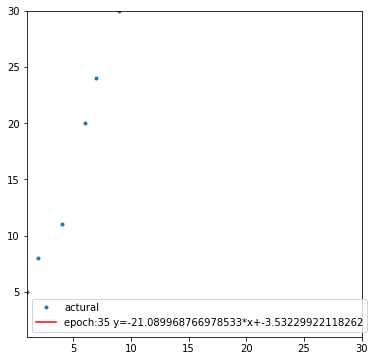

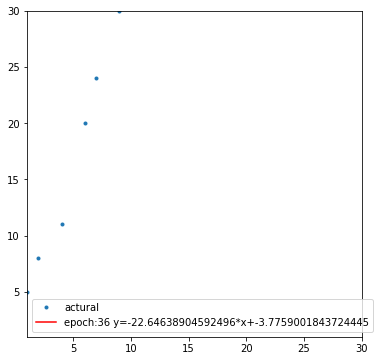

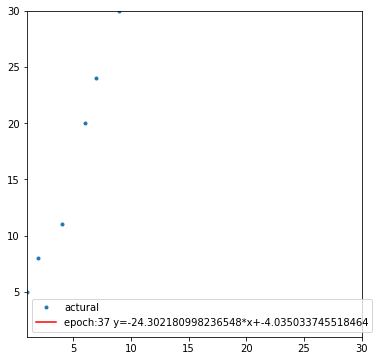

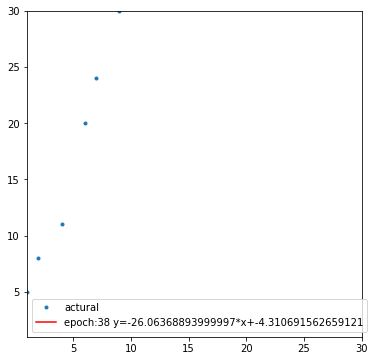

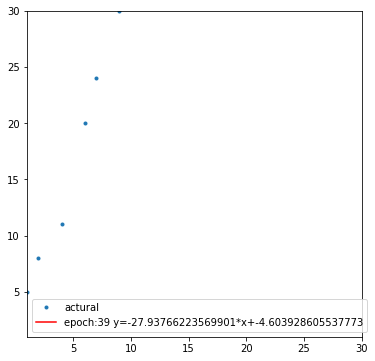

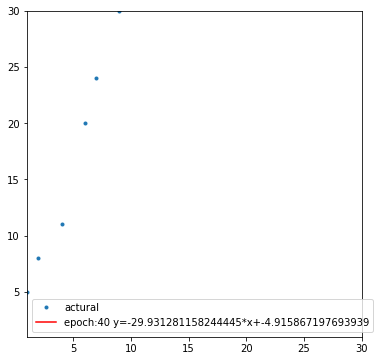

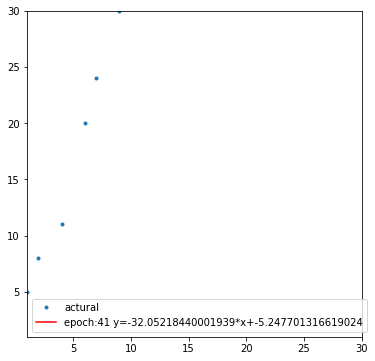

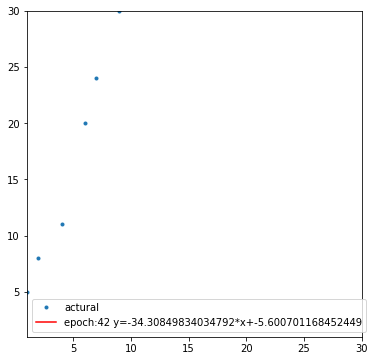

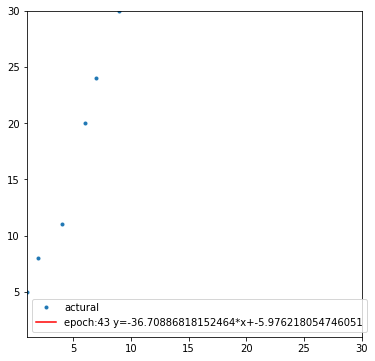

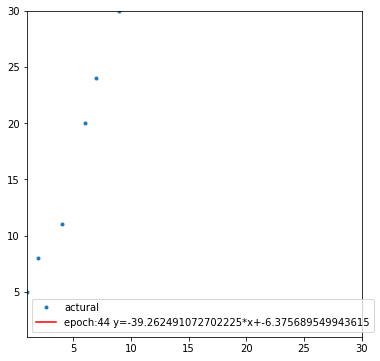

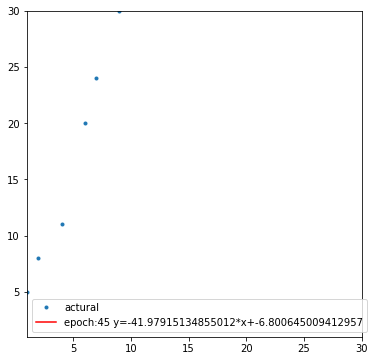

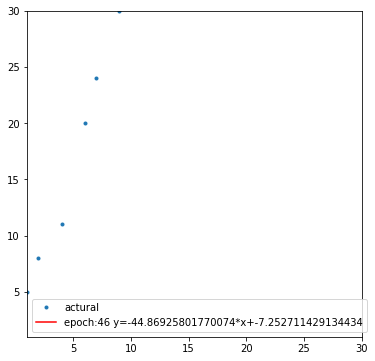

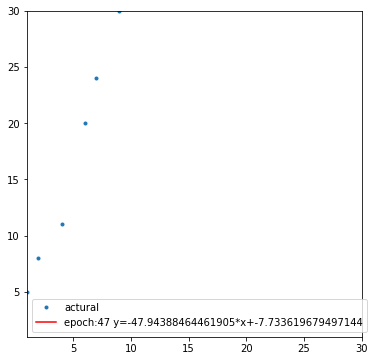

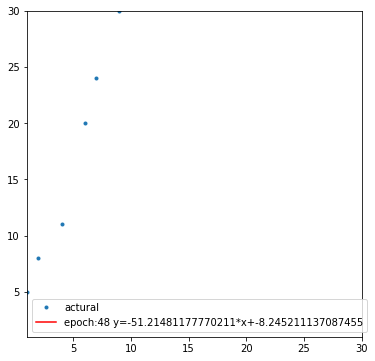

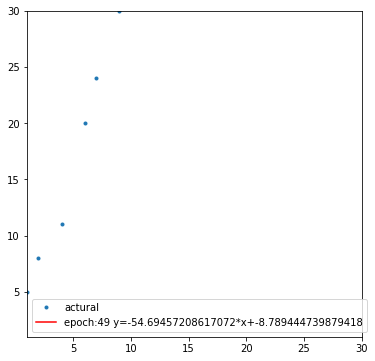

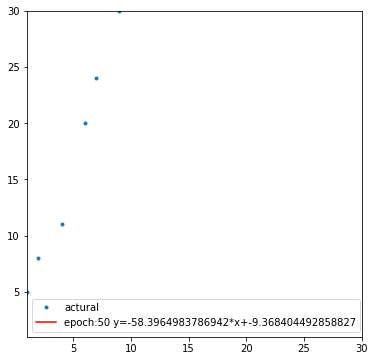

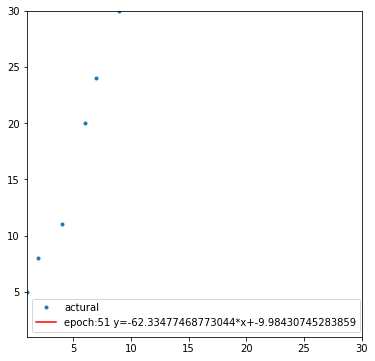

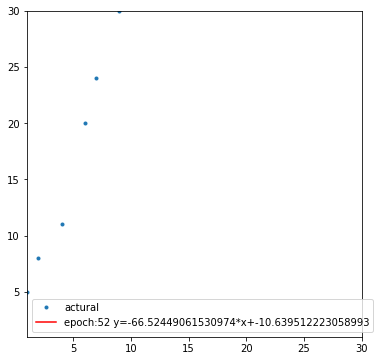

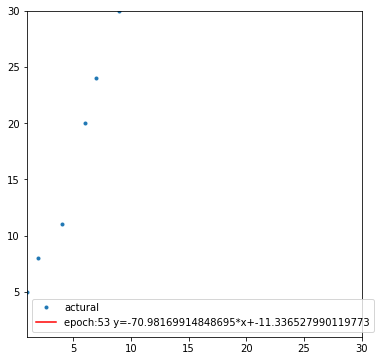

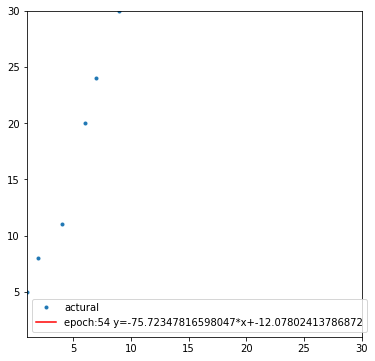

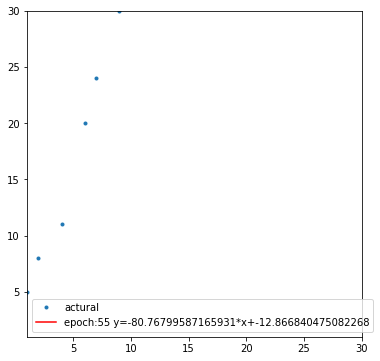

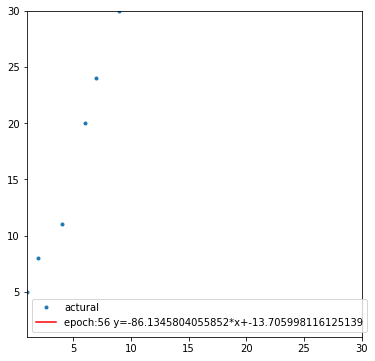

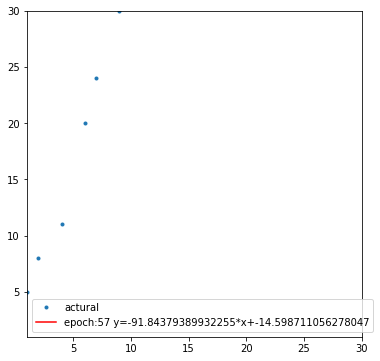

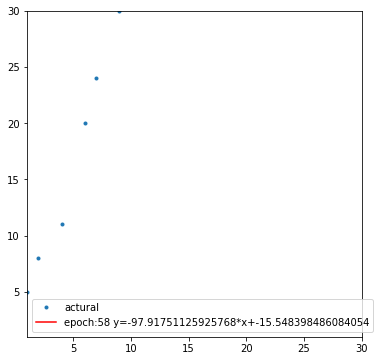

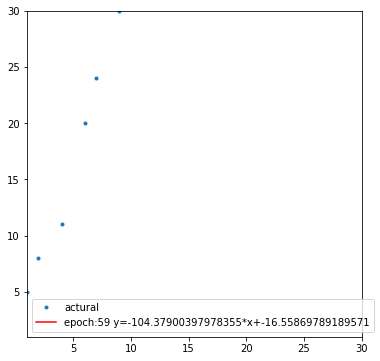

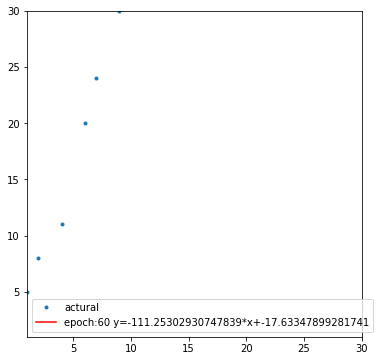

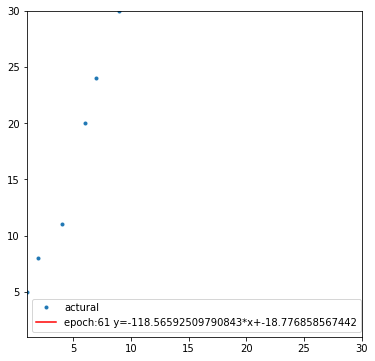

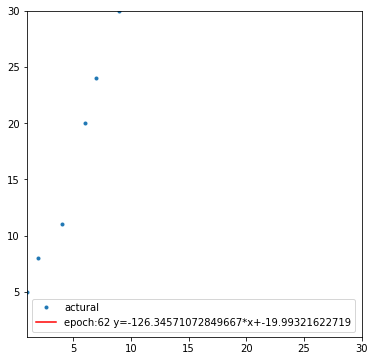

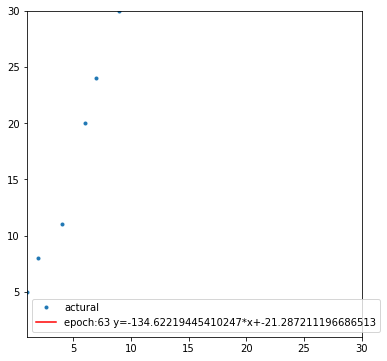

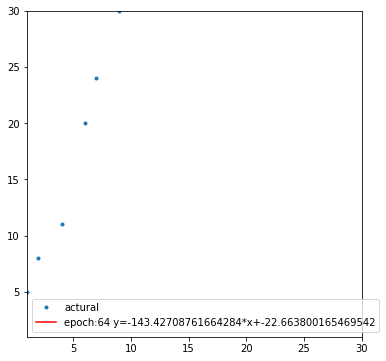

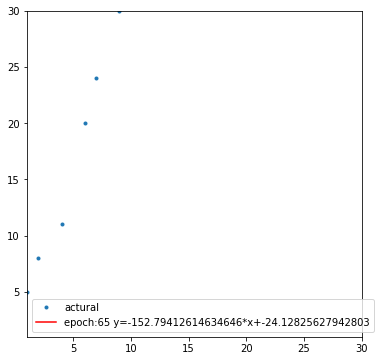

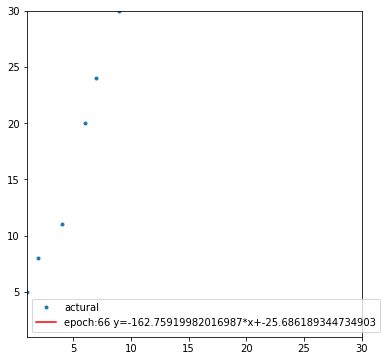

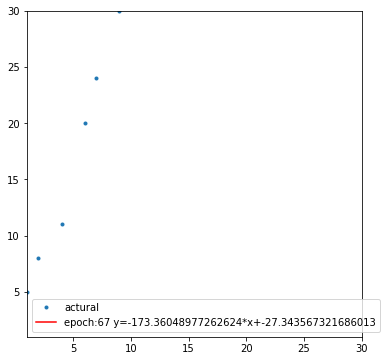

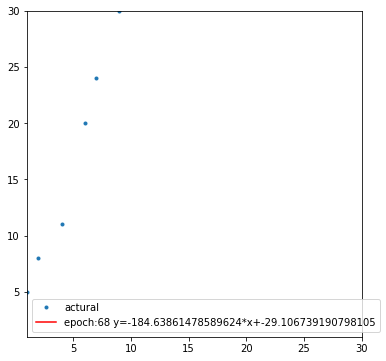

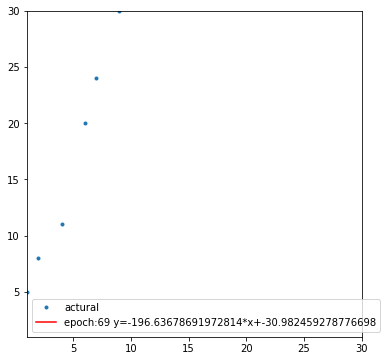

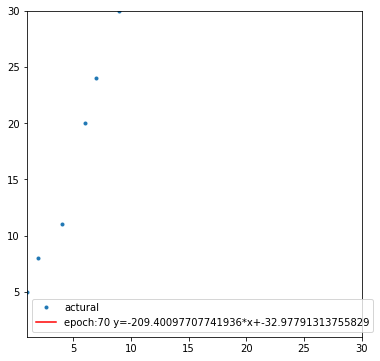

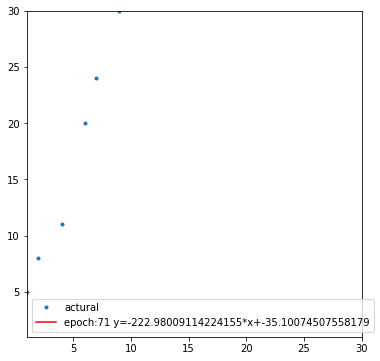

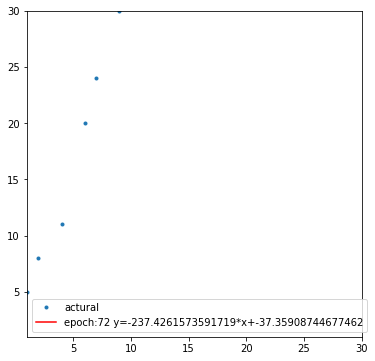

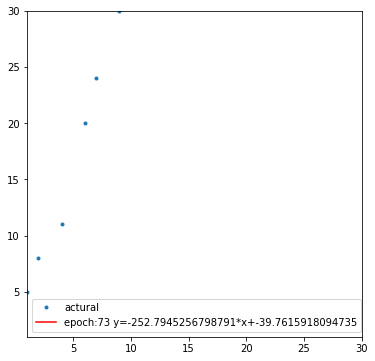

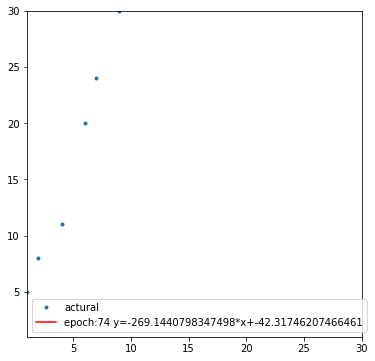

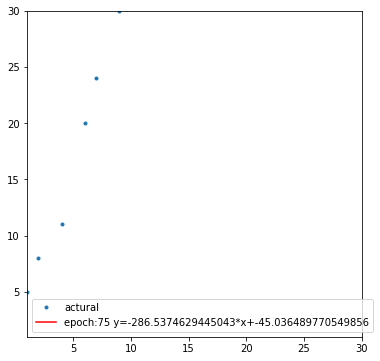

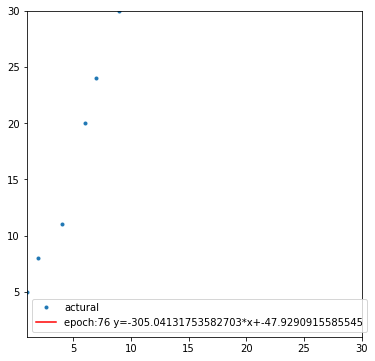

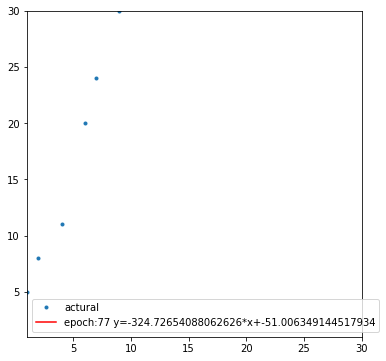

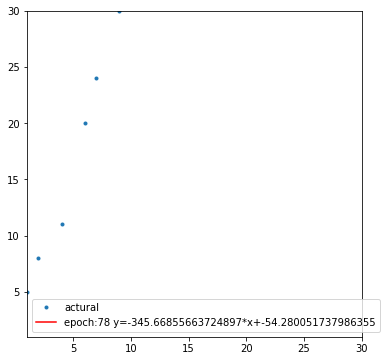

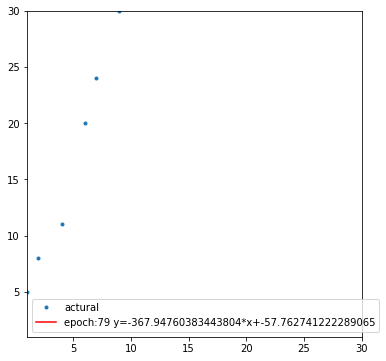

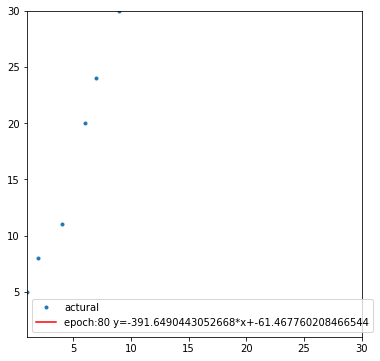

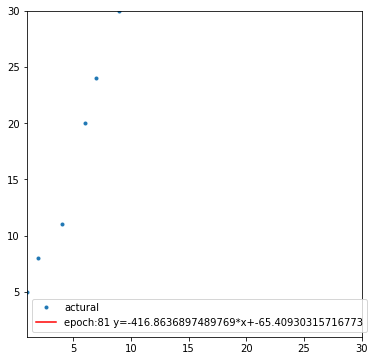

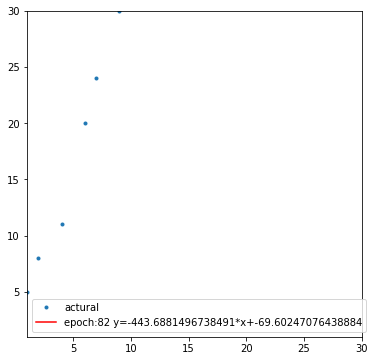

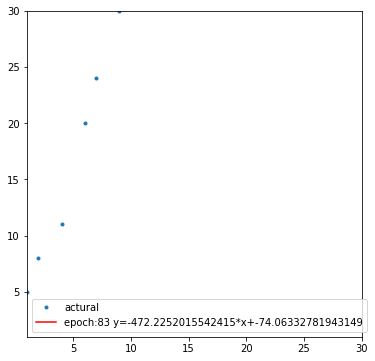

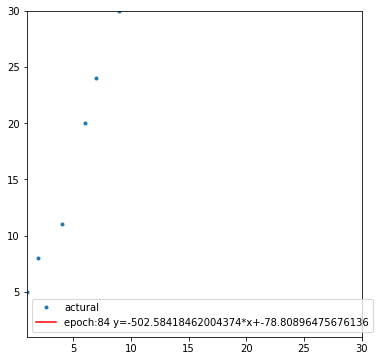

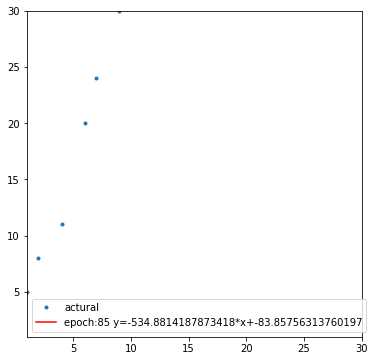

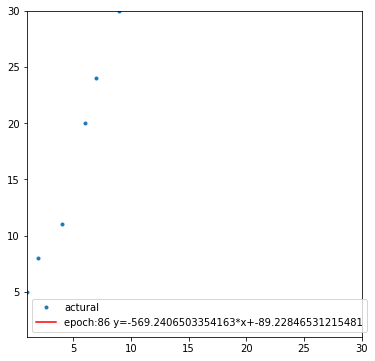

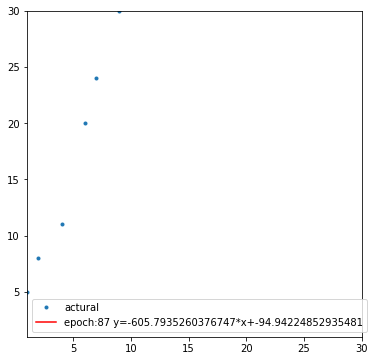

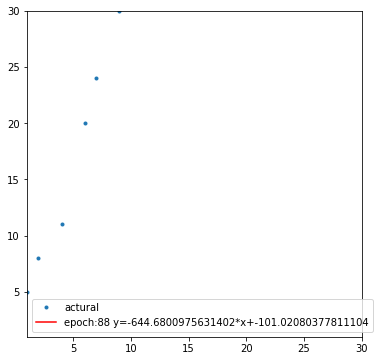

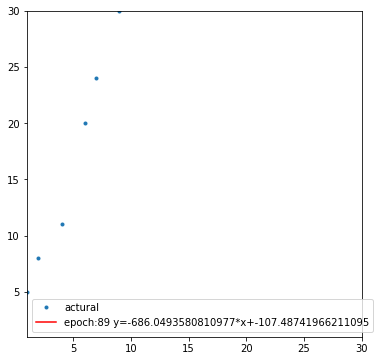

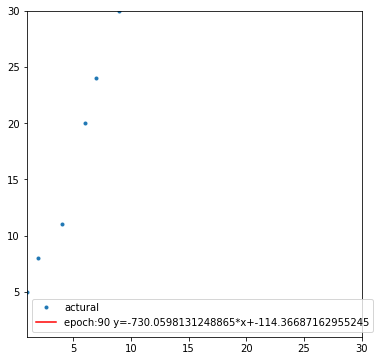

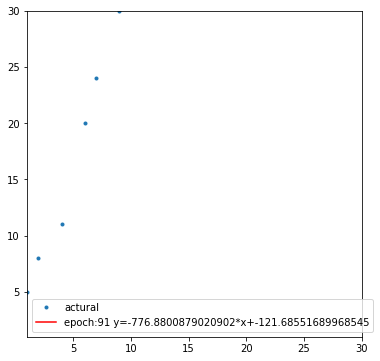

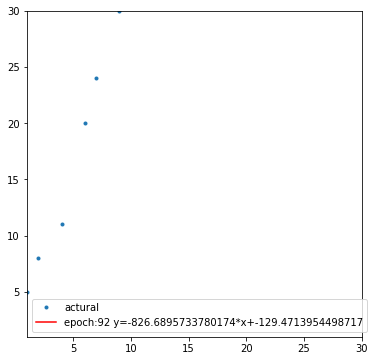

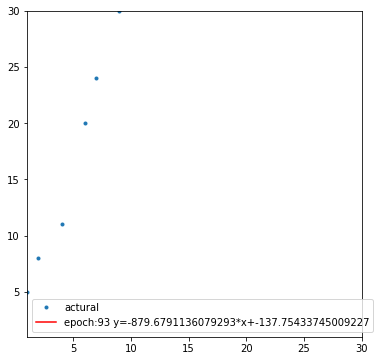

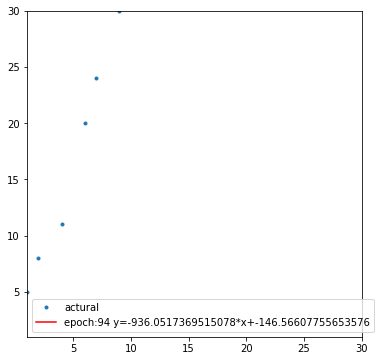

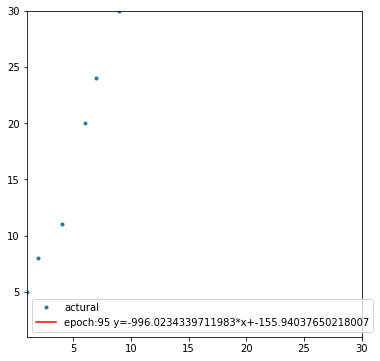

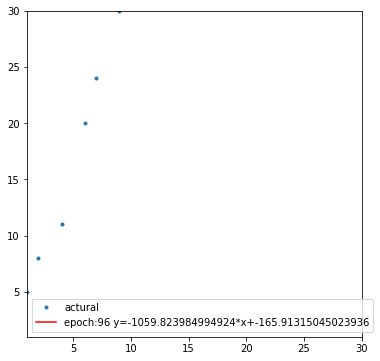

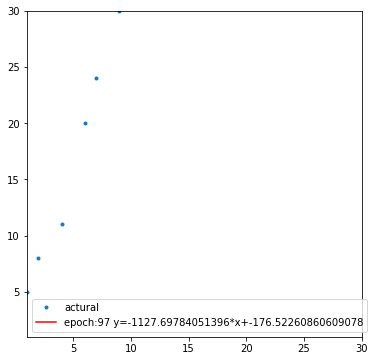

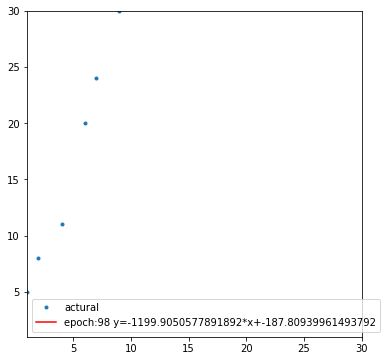

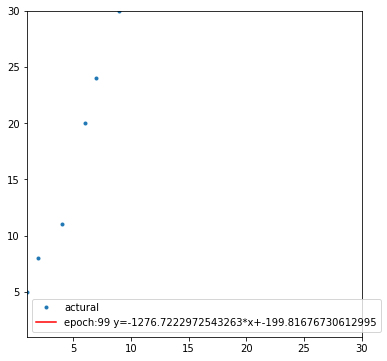

In [13]:
min_val = min(min(xs), min(ys))
max_val = max(max(xs), max(ys))
for epoch, wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]
  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs,ys,'.',label='actural')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()


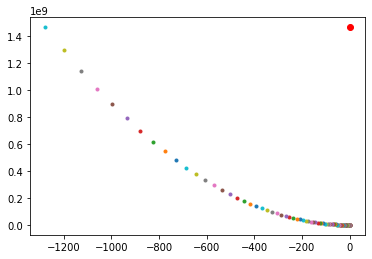

In [14]:
min_index = -1 #최솟값이 있는 인덱스를 -1로 초기화
min_mse = np.inf #mse 최솟값을 무한대로 초기화
for epoch, (wp, bp) in enumerate(wbhl):
  yp=wp*xs+bp
  mse_val = mse(yp,ys)
  if min_mse > mse_val: #새로운 값이 더 작다면
    min_mse = mse_val #작은 값으로 설정
    min_index = epoch #최솟값이 있는 인덱스를 현재 인덱스로 설정
  plt.plot(wp, mse_val, '.')
plt.plot(wbhl[min_index][0],mse_val,'ro')
plt.show()  

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression() #모델 생성
lr_model.fit(ex_xs, ex_ys) #학습
print(f'w:{lr_model.coef_} b:{lr_model.intercept_}')

w:[3.1886121] b:0.9217081850533795


In [17]:
pv = lr_model.predict([[12],[30],[50]]) #예측해주세요
print(pv)

[ 39.18505338  96.58007117 160.35231317]


In [18]:
from sklearn import datasets

In [19]:
iris_data = datasets.load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [20]:
xs = [[x] for x in iris_data.data[:,0]]
print(xs)
ys=[y for y in iris_data.data[:,1]]
print(ys)

[[5.1], [4.9], [4.7], [4.6], [5.0], [5.4], [4.6], [5.0], [4.4], [4.9], [5.4], [4.8], [4.8], [4.3], [5.8], [5.7], [5.4], [5.1], [5.7], [5.1], [5.4], [5.1], [4.6], [5.1], [4.8], [5.0], [5.0], [5.2], [5.2], [4.7], [4.8], [5.4], [5.2], [5.5], [4.9], [5.0], [5.5], [4.9], [4.4], [5.1], [5.0], [4.5], [4.4], [5.0], [5.1], [4.8], [5.1], [4.6], [5.3], [5.0], [7.0], [6.4], [6.9], [5.5], [6.5], [5.7], [6.3], [4.9], [6.6], [5.2], [5.0], [5.9], [6.0], [6.1], [5.6], [6.7], [5.6], [5.8], [6.2], [5.6], [5.9], [6.1], [6.3], [6.1], [6.4], [6.6], [6.8], [6.7], [6.0], [5.7], [5.5], [5.5], [5.8], [6.0], [5.4], [6.0], [6.7], [6.3], [5.6], [5.5], [5.5], [6.1], [5.8], [5.0], [5.6], [5.7], [5.7], [6.2], [5.1], [5.7], [6.3], [5.8], [7.1], [6.3], [6.5], [7.6], [4.9], [7.3], [6.7], [7.2], [6.5], [6.4], [6.8], [5.7], [5.8], [6.4], [6.5], [7.7], [7.7], [6.0], [6.9], [5.6], [7.7], [6.3], [6.7], [7.2], [6.2], [6.1], [6.4], [7.2], [7.4], [7.9], [6.4], [6.3], [6.1], [7.7], [6.3], [6.4], [6.0], [6.9], [6.7], [6.9], [5.8]

In [21]:
xs = np.array([[x] for x in iris_data.data[:,0]])
print(xs.shape)
ys=np.array([y for y in iris_data.data[:,1]])
print(ys.shape)

(150, 1)
(150,)


In [22]:
xs = np.array([[x] for x in iris_data.data[:,0]])
print(xs.shape)
ys=np.array([y for y in iris_data.data[:,1]])
print(ys.shape)

(150, 1)
(150,)


In [23]:
wp, bp, wbhl = gradient_descent(xs,ys)
for epoch, (ewp,ebp) in enumerate(wbhl):
  print(f'epoch:{epoch} w:{ewp} b:{ebp}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 -1.08481281 -1.08481281 -1.24754104 -1.31263233 -1.23126822 -1.16617693
 -1.21499539 -1.21499539 -1.1499041  -1.19872257 -1.18244975 -1.13363128
 -1.1499041  -1.08481281 -1.1499041  -1.16617693 -1.1499041  -1.11735846
 -1.10108564 -1.1499041  -1.26381386 -1.28008668 -1.10108564 -1.11735846
 -1.16617693 -1.18244975 -1.08481281 -1.1499041  -1.16617693 -0.97090306
 -1.11735846 -1.16617693 -1.21499539 -1.08481281 -1.21499539 -1.11735846
 -1.19872257 -1.13363128 -1.11735846 -1.11735846 -1.10108564 -0.97090306
 -1.05226717 -1.05226717 -1.13363128 -0.98717588 -1.06853999 -1.03599435
 -0.92208459 -1.08481281 -0.95463023 -1.06853999 -1.06853999 -1.10108564
 -1.08481281 -1.03599435 -0.95463023 -1.0034487  -1.11735846 -1.05226717
 -1.0034487  -1.05226717 -1.06853999 -1.08481281 -1.05226717 -1.08481281
 -1.06853999 -1.01972152 -0.98717588 -0.98717588 -1.03599435 -1.03599435
 -1.08481281 -1.1499041  -1.10108564 -0.97090306 -1.08481281 -1.0034487
 -1.01972152 -1.

In [30]:
xs2 = np.array(xs)
xs2 = xs2[:,0]
ys2 = np.array(ys)
print(xs2.shape, ys2.shape)

(150,) (150,)


In [31]:
min_val = min(min(xs2), min(ys2))
max_val = max(max(xs2), min(ys2))
for epoch,wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]

  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs2,ys2,'.',label = 'actural')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color = 'black')
  plt.axhline(y=0,color = 'black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

ValueError: ignored

<Figure size 432x432 with 1 Axes>

ValueError: ignored

<Figure size 432x432 with 1 Axes>

KeyboardInterrupt: ignored